In [1]:
import excursion.utils as utils
from excursion import get_gp, ExcursionProblem
import excursion.optimize as optimize
import numpy as np
import scipy.stats
import excursion.plotting.twodim as plots
import os
import logging
logging.basicConfig(level = logging.WARNING)
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def truth0(X):
    return np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.5,0.5], cov = np.diag([0.2,0.3])))
def truth1(X):
    return np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.6,0.8], cov = np.diag([0.2,0.3])))

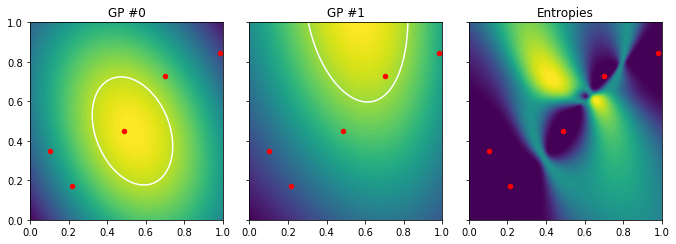

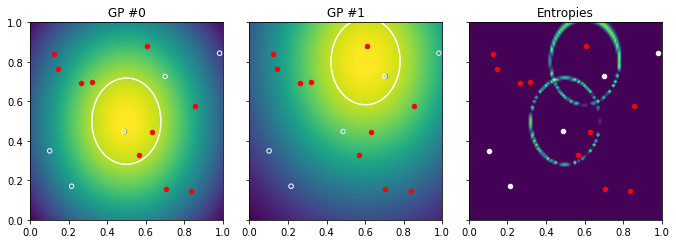

KeyboardInterrupt: 

In [3]:
N_UPDATES = 10
N_BATCH = 10

def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails, batchsize=N_BATCH)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)

scandetails = ExcursionProblem([truth0,truth1], ndim = 2, thresholds=[0.6])
X,y_list,gps = optimize.init(scandetails)
for index in range(N_UPDATES):
    plot_and_save(workdir, index, gps,X,y_list,scandetails)
    newX = optimize.suggest(gps, X, scandetails, batchsize=N_BATCH)
    X,y_list,gps  = optimize.evaluate_and_refine(X,y_list,newX,scandetails)